<h1><center>Problem 2: Design and Strategy </center></h1>

<font size="4">
 Throughout this problem, we will use the Monte-Carlo nethod to find the optimal strategies.
    <\font>

In [237]:

import numpy as np
from matplotlib import pyplot as plt

class Die:
    #This class represent a faire Die
    def __init__(self,n_sides=6):
        self.faces = list(range(1,n_sides+1))
        
    def role_once(self):
        #sample a face from uniform distribution
        return np.random.choice(self.faces)
    
    def __call__(self):
        sample = self.role_once()
        return 'E' if sample%2 == 0 else 'O'
        
        

## Part A : Checking that the six-sided die is faire die
<font size="4">
To do so, we will sample N samples from the die and look at the histogram plot

</font>

Text(0.5, 1.0, 'Histogram of the six faced')

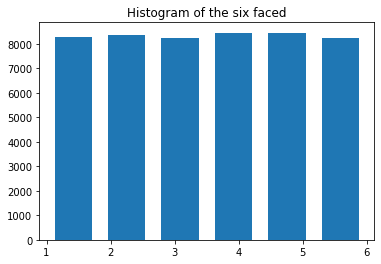

In [236]:
n_samples = 50000
die = Die()

samples = [die.role_once() for _ in range(n_samples)]

plt.hist(samples,rwidth=0.7,bins=6)
plt.title("Histogram of the six faced")

<font size="4">
    We see that the bars have pretty similar sizes. Hence, the die is fair.
    <\font>

## Part B : Computation of the optimal strategy for each player assuming a perfectly fair die
<font size="4">
As stated in the problem set, in this scenario we assume that Player 2 knows a priori the sequence chosen by Player 1. Furthermore we assume that both Players are rational, that is they are always trying to win. 
    
Now, assume that Player 1 choses some sequence, let say, $S_1$. Then, Player 2 can win by choosing a sequence $S_2$, that maximize the follwing probability  $$
\max_{S_2} P[S_1][S_2] = \max_{S_2}P(S_2 \text{ appears before } S_1)
$$
    
that is, the optimal sequence for Player 2 is: $\arg \max_{S_2} P[S_1][S_2]$, while $S_1$ is known by assumption.  
    
Similary, Player 1 knows that Player 2 is rational. Then, Player 1 choses his optimal sequence by solving $$
\min_{S_1} P[S_1][S_2] = \min_{S_1} P(S_2 \text{ appears before } S_1), \quad \forall S_2
$$
this means that Player 1 need to chose the strategy that minimize the probability of Player 2 to win. Note that 
    $$
    \min_{S_1} P[S_1][S_2]\leq \min_{S_1} \max_{S_2} P[S_1][S_2], \quad \forall S_2
    $$
Hence, the optimal sequence for Player 1 is: $\arg\min_{S_1} \max_{S_2} P[S_1][S_2]$      
Now, the last step that we need to compute the optimal strategy for each player is to find the matrix $P[S_1][S_2] = P(S_2 \text{ appears before } S_1) \quad \forall S_1,S_2$
    
In order to do so, we will use the Monte-Carlo method. where for each $P_1,P_2$ we will run $N$ experiments to estimate $P[S_1][S_2] = P(S_2 \text{ appears before } S_1)$. By Law of Large Numbers, we now that this estimation converges to the real probability if $N$ is arbitrarily large. The code follows: 
</font>

In [238]:
#Possible outcomes
outcomes = ["E","O"]

#All possible sequences 
seqs = ["".join([a,b,c]) for a in outcomes for b in outcomes for c in outcomes]

In [287]:
n_samples = 10000
#Simulator of the game
def play_game(p1,p2):
    rolls = ""
    winners_history = []
    for n in range(n_samples):
        i = 0
        rolls = ""
        while True:
            rolls += die()
            if p1 in rolls:
                winners_history.append(1)
                break
            if p2 in rolls:
                winners_history.append(2)
                break
                
            if i>1e5:
                break
            i += 1
            
    return winners_history
    
    

In [288]:
strategy_dict = {}
#estimate the P
for p1 in seqs:
    for p2 in seqs:
        if p1 == p2:
            continue
        winner = play_game(p1,p2)
        #Estimate of probability that Player 1 wins
        prob1 = np.sum((np.array(winner)== 1).astype(np.float))/len(winner)
        #Estimate of probability that Player 2 wins
        prob2 = np.sum((np.array(winner)== 2).astype(np.float))/len(winner)
        strategy_dict[(p1,p2)] = (prob1,prob2)
        


In [289]:
#Construction of P such that 
#P[S1][S2] = P(S_2 appears before S_1) that Prob Player 2 to win 

P = {}
for (s1,s2),(prob1,prob2) in strategy_dict.items():
    if P.get(s1) is None:
        P[s1] = dict()
        
    P[s1][s2] = prob2
    

<font size="4">
Now, let find the optimal strategies. But before doing that, let pick an example and see what happens. 

    
Assume that Player 1 chooses the sequence "EEE", the otimal move for Player 2 is: 
</font>

In [290]:
P["EEE"]

{'EEO': 0.4997,
 'EOE': 0.593,
 'EOO': 0.5989,
 'OEE': 0.8762,
 'OEO': 0.5892,
 'OOE': 0.7041,
 'OOO': 0.501}

In [291]:
#Get sequence with max probabily of wining
optim_seq = max(P["EEE"], key = lambda key: P["EEE"][key])
print("Optimal move for Player 2 is '{}' ".format(optim_seq))


Optimal move for Player 2 is 'OEE' 


<font size="4">
Recall that the optimal strategy for Player 1 is $$
    \min_{S_1} P[S_1][S_2]\leq \min_{S_1} \max_{S_2} P[S_1][S_2], \quad \forall S_2
    $$
 Thus the optimal sequence for Player 1 is:
</font>

In [304]:
absolute_optimal_strategy_for_player_1 = S1 = min(P, key= lambda s1: max(P[s1], key=lambda s2: P[s1][s2]))
print("Absolut best winner sequence for Player 1 is '{}' ".format(S1))

Absolut best winner sequence for Player 1 is 'EOE' 


<font size="4">
Recall that the optimal strategy for Player 1 is $$
    \max_{S_2} P[S^*_1][S_2]
    $$
 While $S^*_1$ is the best strategy for Player 2. Thus the optimal sequence for Player 1 is:
</font>

In [293]:
absolute_optimal_strategy_for_player_2 = S2 =  max(P[S1], key=lambda S2: P[S1][S2])
print("Absolut best winner sequence for Player 2 is '{}' ".format(S2))

Absolut best winner sequence for Player 2 is 'EEO' 


## Part C : Probability Player 2 (AI agent) will win, given the optimal strategies above is: 

In [295]:
print("Probability Player 2 (AI agent) will win, given the optimal strategies above is {:0.2f}%" .format(100*P[absolute_optimal_strategy_for_player_1][absolute_optimal_strategy_for_player_2]))

Probability Player 2 (AI agent) will win, given the optimal strategies above is 66.74%


<font size="4">
    As we may, a priori, predicted, Player 2 should have more chance to win. This is, obviously, because of the advantage of the a priori information.
    </font>

## Part D : The game when Player 2 does not have any information about the choices of Player 1: 

<font size="4">
   Now that Player 2 does not have anymore the advantage of information, its optimal strategy is chosen such that the following is maximized:
    $$
    \max_{S_2} P[S_1][S_2] = \max_{S_2}P(S_2 \text{ appears before } S_1), \quad \forall S_1
$$
    Note that,
    $$
    \max_{S_2} \min_{S_1}P[S_1][S_2]\leq \max_{S_2} P[S_1][S_2], \quad \forall S_1
$$
Hence, the optimal sequence for Player 2 is: $\arg\max_{S_2} \min_{S_1}P[S_1][S_2]$

The way to compute optimal strategy for Player 1 remains unchanged, that is solving the following minimization problem:
 $$
\min_{S_1} P[S_1][S_2]\leq \min_{S_1} \max_{S_2} P[S_1][S_2], \quad \forall S_2 
$$
Hence, the optimal sequence for Player 1 is: $\arg\min_{S_1} \max_{S_2}P[S_1][S_2]$
    
Note that, solving these two equations and finding the optimal strategies lead to a Nash equilibria. That is, assuming that the Players are rational, each Player won't have any interest in changing his strategy after solving the $\min\max$ problem above. 
    

The new optimal strategies for each player is
 
 </font>

In [305]:
absolute_optimal_strategy_for_player_2 = S2 = max(P, key= lambda s1: min(P[s1], key=lambda s2: P[s1][s2]))
absolute_optimal_strategy_for_player_1 = S1 = min(P, key= lambda s1: max(P[s1], key=lambda s2: P[s1][s2]))


print("Absolut best winner sequence for Player 1 is '{}' ".format(S1))
print("Absolut best winner sequence for Player 2 is '{}' ".format(S2))
print("Probability Player 2 (AI agent) will win, given the optimal strategies above is {:0.2f}%" .format(100*P[S1][S2]))

Absolut best winner sequence for Player 1 is 'EOE' 
Absolut best winner sequence for Player 2 is 'EEO' 
Probability Player 2 (AI agent) will win, given the optimal strategies above is 66.74%


<font size="4">
 Surprisingly, the results of optimality are exactly the same as in the case of a priori known strategy of Player 1 by Player 2. This can be explained very simply by the fact that the main assumption of rationnality , that is, both players are rationnal leads to a Nash Equilibria that can be computed independantly of the shared information. However, if Player 1, in the first case when the information is shared, decides to not be rationnal, then the information is crucial for Player 2.
  <\font>